Import Libraries

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

Loading Dataset

In [6]:
mnist=pd.read_csv(r"C:\Users\umite\Desktop\vs_yapay_zeka\mnist_digit_recognizer\mnist.csv")

Images('X') and Labels('y')

In [9]:
X= mnist.drop(labels = ["label"],axis = 1) 
y= mnist["label"]

Splitting Train and Test Set

In [10]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

Reshaping Images

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

0-1 Normalization

In [12]:
X_train=X_train/X_train.max()
X_test=X_test/X_test.max()

'y' Values Transformaiton Numerical to Categorical

In [13]:
y_cat_train=to_categorical(y_train,10)

Creating CNN Model

In [14]:
model=Sequential()

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

Compile Model

In [15]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Fitting Model

In [16]:
model.fit(X_train,y_cat_train,epochs=30,verbose=1)

Epoch 1/30
880/880 [==============================] - 20s 22ms/step - loss: 0.1892 - accuracy: 0.9417
Epoch 2/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0584 - accuracy: 0.9824
Epoch 3/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0384 - accuracy: 0.9874
Epoch 4/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0295 - accuracy: 0.9903
Epoch 5/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0223 - accuracy: 0.9927
Epoch 6/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0154 - accuracy: 0.9951
Epoch 7/30
880/880 [==============================] - 19s 22ms/step - loss: 0.0171 - accuracy: 0.9944
Epoch 8/30
880/880 [==============================] - 19s 21ms/step - loss: 0.0113 - accuracy: 0.9960
Epoch 9/30
880/880 [==============================] - 19s 21ms/step - loss: 0.0098 - accuracy: 0.9972
Epoch 10/30
880/880 [==============================] - 19s 21ms/step - loss: 0.009

Making Predictions

In [18]:
preds=model.predict(X_test)
preds

434/434 [==============================] - 3s 8ms/step


array([[1.2544488e-22, 4.3923001e-18, 1.0523731e-16, ..., 5.2310936e-24,
        1.0000000e+00, 5.5114377e-22],
       [1.3259280e-14, 1.0000000e+00, 4.2702999e-13, ..., 3.0949527e-14,
        2.7239972e-18, 1.9508641e-18],
       [1.3792938e-22, 1.0229617e-21, 5.2689223e-25, ..., 2.8839197e-12,
        2.6091050e-15, 1.0000000e+00],
       ...,
       [2.0918659e-22, 2.0226376e-31, 7.4566911e-33, ..., 0.0000000e+00,
        3.9106295e-20, 0.0000000e+00],
       [2.1004288e-23, 3.7076746e-13, 4.8463923e-17, ..., 1.8057003e-18,
        5.0924447e-15, 2.4398691e-16],
       [4.4366652e-29, 2.0555645e-15, 1.0000000e+00, ..., 1.4306111e-21,
        2.5842821e-11, 4.9465080e-31]], dtype=float32)

In [19]:
preds=np.argmax(preds,axis=1)
preds

array([8, 1, 9, ..., 6, 3, 2], dtype=int64)

Evaluating Predictions

In [22]:
accuracy_score(y_test,preds)

0.9919191919191919

In [24]:
# We have % 99.2 accuracy.

Confusion Matrix

<AxesSubplot:>

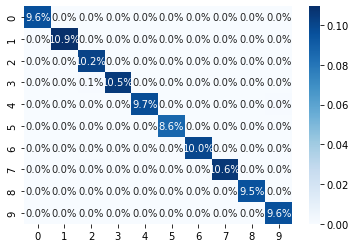

In [31]:
cf_matrix=confusion_matrix(y_test,preds)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.1%', cmap='Blues')